In [8]:
import pandas as pd
import numpy as np
import random
from numpy import arange 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.collections as collections
import matplotlib.gridspec as gridspec
import os
import csv
import scipy.misc
from scipy.stats import bernoulli
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import cv2


import tensorflow as tf
from keras.layers import Dense, Flatten, Lambda, Activation, MaxPooling2D
from keras.layers.convolutional import Convolution2D
from keras.models import Sequential
from keras.optimizers import Adam

%matplotlib inline  
matplotlib.style.use('ggplot')

In [9]:
log_path = './data/driving_log.csv'
img_path = './data/IMG'
rolling_window = 3
amp_factor = 1.5
steering_offset = 0.1

In [11]:
###Load Driving Log data into system\

columns = ['centre', 'left', 'right',
                'steering_angle', 'throttle', 'brake', 'speed']
# data_df = pd.read_csv(log_path+'/driving_log.csv',names=column_names)
data = pd.read_csv(log_path,names=columns)
print(data.head())
print("Dataset Columns:", columns, "\n")
print("Shape of the dataset:", data.shape, "\n")
print(data.describe(), "\n")
print("Data loaded...")

                                              centre  \
0  /home/chu-chu/Desktop/data/IMG/center_2018_01_...   
1  /home/chu-chu/Desktop/data/IMG/center_2018_01_...   
2  /home/chu-chu/Desktop/data/IMG/center_2018_01_...   
3  /home/chu-chu/Desktop/data/IMG/center_2018_01_...   
4  /home/chu-chu/Desktop/data/IMG/center_2018_01_...   

                                                left  \
0  /home/chu-chu/Desktop/data/IMG/left_2018_01_03...   
1  /home/chu-chu/Desktop/data/IMG/left_2018_01_03...   
2  /home/chu-chu/Desktop/data/IMG/left_2018_01_03...   
3  /home/chu-chu/Desktop/data/IMG/left_2018_01_03...   
4  /home/chu-chu/Desktop/data/IMG/left_2018_01_03...   

                                               right  steering_angle  \
0  /home/chu-chu/Desktop/data/IMG/right_2018_01_0...             0.0   
1  /home/chu-chu/Desktop/data/IMG/right_2018_01_0...             0.0   
2  /home/chu-chu/Desktop/data/IMG/right_2018_01_0...             0.0   
3  /home/chu-chu/Desktop/data/IMG/righ

In [12]:
data['steering_angle'].describe()

count    5209.000000
mean        0.001080
std         0.138584
min        -0.720029
25%         0.000000
50%         0.000000
75%         0.000000
max         0.974531
Name: steering_angle, dtype: float64

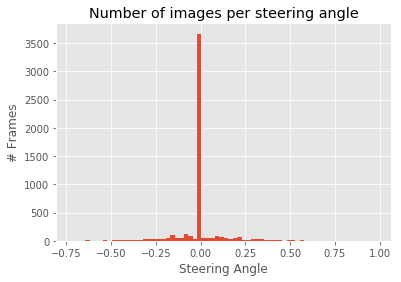

In [14]:
binwidth = 0.025
# histogram before image augmentation
plt.hist(data.steering_angle,bins=np.arange(min(data.steering_angle), max(data.steering_angle) + binwidth, binwidth))
plt.title('Number of images per steering angle')
plt.xlabel('Steering Angle')
plt.ylabel('# Frames')
plt.show()


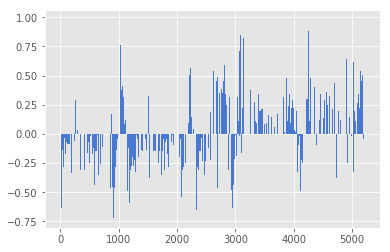

In [18]:
with plt.style.context(('seaborn-muted')):
    plt.bar(data.steering_angle.index, data.steering_angle.values,width=10)
    plt.show()
    

In [21]:
def convert_to_rgb(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

def random_flip(image,steering_angle):
    coin=np.random.randint(0,2)
    if coin==0:
        image,steering_angle=cv2.flip(image,1),-steering_angle
    return image,steering

def resize_image(image):
    return cv2.resize(image,(64,64), interpolation=cv2.INTER_AREA)

def random_brightness(image):
    image_hsv = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = 1.0 + 0.1*(2*np.random.uniform()-1.0)    
    image_hsv[:,:,2] = image1[:,:,2]*random_bright
    image_rgb = cv2.cvtColor(image_hsv,cv2.COLOR_HSV2RGB)
    return image_rgb

def crop_image(image):
    '''crop the top 1/5 of the image to remove the horizon and the bottom 25 pixels to remove the car’s hood'''
    return image[math.floor(shape[0]/5):shape[0]-25, 0:shape[1]]

# def left_and_right_correction():
    
def random_translation(image, steering_angle, pixels=2):
    """
    Randomly move the image
    """
    rows, cols = image.shape[:2]
    size = cols, rows
    x = np.random.uniform(-pixels, pixels)
    y = np.random.uniform(-pixels, pixels)
    new_steering_angle += x * 0.002
    translation = np.float32([[1,0,x],[0,1,y]])
    translated_image = cv2.warpAffine(image, translation, size)
    return translated_image, new_steering_angle

In [ ]:
def generate_new_data():
    new_image = []
    new_steering_angle = []
    for i in len(image):
        

In [ ]:
def img_translate(img, x_translation, trans_y_range=20):
    # Randomly compute a Y translation
    y_translation = (trans_y_range * np.random.uniform()) - (trans_y_range / 2)

    # Form the translation matrix
    translation_matrix = np.float32([[1, 0, x_translation], [0, 1, y_translation]])

    # Translate the image
    return cv2.warpAffine(img, translation_matrix, (img.shape[1], img.shape[0]))

In [ ]:
def preprocess(image):
    

In [ ]:
def translate_image(image, x_trans):
    y_trans = TRANS_Y_RANGE * np.random.uniform() - TRANS_Y_RANGE / 2
    M = np.array([[1, 0, x_trans], [0, 1, y_trans]])
    return cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

def translate_angle(angle, x_trans):
    return angle + x_trans / TRANS_X_RANGE * 2 * ANGLE_PER_TRANS

tr_images = []
tr_angles = []
for image in images:
    x_trans = data.generate_x_trans()
    tr_images.append(data.translate_image(image, x_trans))
    tr_angles.append(data.translate_angle(angle, x_trans))
plot_samples(tr_images, tr_angles)

In [ ]:
def trans_image(image,steer,trans_range):
    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    steer_ang = steer + tr_x/trans_range*2*.2
    tr_y = 40*np.random.uniform()-40/2
    #tr_y = 0
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    image_tr = cv2.warpAffine(image,Trans_M,(cols,rows))
    
    return image_tr,steer_ang


In [ ]:
hidtory = model.fit_generator(batchgen(x_train_lsee, y_train_less), samples_per_epoch, nb_epoch=nb_epoch, verbose=1, max_q_size=max_q_sixe, callbackks=callbacks_list, validation_data = None, class_weight=None, pickle_safe=Faslse)

In [ ]:
def preprocess(image):
    roi = crop_image(image)
    resized_image = resize(roi)
    return resize_image

In [ ]:
batch_size = 16

train_generator = generator(train_samples, batch_size=batch_size)
validation_generator = generator(validation_samples, batch_size=batch_size)

image_shape = (160, 320, 3)

model = Sequential()

model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=image_shape, output_shape=image_shape))
model.add(Cropping2D(cropping=((70,25), (0,0))))

model.add(Convolution2D(24, 5, 5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(36, 5, 5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(48, 5, 5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit_generator(train_generator, samples_per_epoch= 
            len(train_samples), validation_data=validation_generator, 
            nb_val_samples=len(validation_samples), nb_epoch=3)

model.save('nvidia_gen.h5py')
print('DONE!')